<a href="https://colab.research.google.com/github/GauravBajpai3/DS_2021/blob/main/MFDS_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import random as rd

num1=rd.randint(0,1000000)
num2=rd.randint(0,1000000)

num_range = 1000000
strt_time = time.time()

for num in range(1,num_range+1):
  result=num1+num2

end_time = time.time()

total_time = end_time - strt_time

print("Total Time Taken - ", total_time)
print("Tiem per Operation - ", total_time/num_range)

Total Time Taken -  0.12464690208435059
Tiem per Operation -  1.246469020843506e-07


In [ ]:
import time
import random as rd

num1=rd.randint(0,1000000)
num2=rd.randint(0,1000000)

num_range = 1000000
strt_time = time.time()

for num in range(1,num_range+1):
  result=num1*num2

end_time = time.time()

total_time = end_time - strt_time

print("Total Time Taken - ", total_time)
print("Tiem per Operation - ", total_time/num_range)

Total Time Taken -  0.1186068058013916
Tiem per Operation -  1.186068058013916e-07


In [ ]:
import time
import random as rd

num1=rd.randint(0,1000000)
num2=rd.randint(0,1000000)

num_range = 1000000
strt_time = time.time()

for num in range(1,num_range+1):
  result=num1/num2

end_time = time.time()

total_time = end_time - strt_time

print("Total Time Taken - ", total_time)
print("Tiem per Operation - ", total_time/num_range)

Total Time Taken -  0.10894274711608887
Tiem per Operation -  1.0894274711608886e-07


In [ ]:
result=["abc","xyz"]
print(len(result))

2


<b>Question -2.i</b>
(Diagonally Dominance Check)

In [140]:
import random as rd

#Function to generate random matrix of range(m,n)
# zero_fill is flag to create Zero Matrix
def Generate_Random_Matrix(m,n,zero_fill):
  #random_matrix = [[0,0],[0,0]]
  #random_matrix = [[0 for k in range(m)]] * n
  matrix = []
  #print(random_matrix)
  for i in range(m):
    row = []
    for j in range(n):
      #random_matrix[i][j] = rd.randint(0,100)
      if(zero_fill=='Y'):
        row.append(0)
      else:
        row.append(rd.randint(-100,100))
    matrix.append(row)
  return matrix

# Function to check Diagonally Dependent Matrix and Suggest Row movement if possible
def is_diagonally_dependent(matrix):
  m=len(matrix)
  n=len(matrix[0])

  print("Initialized Matrix B with Zero entries -")
  B = Generate_Random_Matrix(m,n,'Y')
  print(B)
  print("\n")

  print("Update Matrix B as per below condition -")
  print("b(i,j) = 1 if |a(i,j)| > a(i,1)| + |a(i,2)| + ... + |a(i,j-1)| + |a(i,j+1)| + |a(i,n)|")
  print("       = 0 otherwise")
  print("\n")

  for i in range(m):
    sum = 0
    for j in range(n):
      sum = sum + abs(matrix[i][j])
    for k in range(n):
      B[i][k] = 1 if(abs(matrix[i][k])> sum - abs(matrix[i][k])) else 0
 
  print("Updated Matrix B -\n",B,"\n")

  # Check for Diagonally Dominance and Row movement if required.
  move_rows = ""
  for i in range(m):
    sum = 0
    for j in range(n):
      sum = sum + B[i][j] # Sum of Row Elements
    
    if(sum == 1 and B[i][i]==1):
      ind = True
    else:
      if(sum != 1):
        ind = False
        move_rows = "No Row Movement Possible"
        return ind,move_rows      
      else:
        if(sum == 1 and B[i][i] != 1):
          move_rows = move_rows + str(i+1) + " "
          ind = False
 
  return ind,move_rows


#A = [[5,-1,3],[2,-8,1],[-2,0,4]]
#A = [[-2,0,4],[2,-8,1],[5,-1,3]]
#A = [[4,2,-2],[0,4,2],[1,0,4]]
A = [[3,1,2],[2,4,1],[1,1,2]]
 
#A = Generate_Random_Matrix(3,3,'N')

print("Input Matrix A -\n",A,"\n")
is_diag,rows = is_diagonally_dependent(A)

print("Result -")
if(is_diag):
  print("*** A is Diagonally Dependent")
else:
  print("*** A is Not Diagonally Dependent")
  print("*** Required Rows Movement : ",rows)



Input Matrix A -
 [[3, 1, 2], [2, 4, 1], [1, 1, 2]] 

Initialized Matrix B with Zero entries -
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


Update Matrix B as per below condition -
b(i,j) = 1 if |a(i,j)| > a(i,1)| + |a(i,2)| + ... + |a(i,j-1)| + |a(i,j+1)| + |a(i,n)|
       = 0 otherwise


Updated Matrix B -
 [[0, 0, 0], [0, 1, 0], [0, 0, 0]] 

Result -
*** A is Not Diagonally Dependent
*** Required Rows Movement :  No Row Movement Possible


<b>Question -2.iv</b>
(Gauss Seidel Method)

In [4]:

# Defining our function as seidel which takes 3 arguments
# as A matrix, Solution and B matrix
   
def seidel(a, x ,b):
    #Finding length of a(3)       
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    converge_ind = 1
    for j in range(0, n):        
        # temp variable d to store b[j]
        d = b[j]                  

        # Hodl the old X value
        y = x[j]  
        # to calculate respective xi, yi, zi
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution        
        x[j] = d / a[j][j]
        
        print(x[j] - y)
        if(x[j] - y < 0.0001):          
          converge_ind = converge_ind * 1
        else:
          converge_ind = 0
    # returning our updated solution           
    return x,converge_ind    

def jacobi(a, x ,b):
    #Finding length of a(3)       
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    converge_ind = 1
    for j in range(0, n):        
        # temp variable d to store b[j]
        d = b[j]                  

        # Hodl the old X value
        y = x[j]  
        # to calculate respective xi, yi, zi
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution        
        x[j] = d / a[j][j]
        
        print(x[j] - y)
        if(x[j] - y < 0.0001):          
          converge_ind = converge_ind * 1
        else:
          converge_ind = 0
    # returning our updated solution           
    return x,converge_ind  


# int(input())input as number of variable to be solved                
n = 3                              
a = []                            
b = []        
# initial solution depending on n(here n=3)                     
x = [0, 0, 0]                        
a = [[20, 1, -2],[3, 20, -1],[2, -3, 20]]
b = [17,-18,25]

print("A = ",a)
print("X = ",x)
print("B = ",b,"\n")
converge_ind = 0
#loop run for m times depending on m the error value
for i in range(0, 10):            
    x,converge_ind = seidel(a, x, b)
    #print each time the updated solution
    print("Iteration: ",i," - ",x)
    #print("Converging: ",converge_ind)
    if(converge_ind):
      break;

A =  [[20, 1, -2], [3, 20, -1], [2, -3, 20]]
X =  [0, 0, 0]
B =  [17, -18, 25] 

0.85
-1.0275
1.010875
Iteration:  0  -  [0.85, -1.0275, 1.010875]
0.15246250000000006
0.02767437500000003
-0.011095093749999951
Iteration:  1  -  [1.0024625, -0.999825625, 0.99977990625]
-0.00249322812500008
-0.00018077046874986902
0.00022220724218768861
Iteration:  2  -  [0.999969271875, -1.00000639546875, 1.0000021134921877]
3.125924765634558e-05
6.4214749607716115e-06
-2.162703521713105e-06
Iteration:  3  -  [1.0000005311226563, -0.9999999739937891, 0.999999950788666]


**Q2.ii and iii**

In [15]:
import numpy as np
a = np.float_(np.random.randint(1,10,size=(4,4)))
print("input matrix\n",a) 
b =(np.diag(a))
for i in range(0, 4):
  n = b[i]
  for j in range(0,4):
    factor = a[i, j] /  n
    a[i, j] =factor

U = np.triu(a,1)
L = np.tril(a,-1)
I = np.tril(np.triu(a))
D= I+L

def norm(n,m,d):
  f = 0
  for i in np.arange(n):
    for j in np.arange(m):
      f = f + np.sum(np.power(np.abs(d[i, j]), 2))
  print("\nFrobenius Norm", np.sqrt(f))

  colsums = []
  for i in np.arange(m):
      v = np.sum(np.abs(d[:, i]))
      colsums.append(v)

  print("1 -Norm", np.max(colsums))

  rowsums = []
  for i in np.arange(n):
      v = np.sum(np.absolute(d[i, :]))
      rowsums.append(v)

  print("∞ -Norm", np.max(rowsums))

def jacobi(U,L):
  d = -(L+U)
  print("Gause jacobi iteration matrix\n", d)
  n, m = d.shape
  norm(n,m,d)

def seidel(D,U):
  c = np.linalg.inv(D)
  d = np.dot(c,U)
  print("\nGause seidel iteration matrix\n", d)
  n, m = d.shape
  norm(n,m,d)

jacobi(U,L)
seidel(D,U)

input matrix
 [[9. 8. 2. 5.]
 [4. 8. 8. 7.]
 [6. 3. 6. 4.]
 [1. 5. 6. 9.]]
Gause jacobi iteration matrix
 [[-0.         -0.88888889 -0.22222222 -0.55555556]
 [-0.5        -0.         -1.         -0.875     ]
 [-1.         -0.5        -0.         -0.66666667]
 [-0.11111111 -0.55555556 -0.66666667 -0.        ]]

Frobenius Norm 2.3714235579832685
1 -Norm 2.0972222222222223
∞ -Norm 2.375

Gause seidel iteration matrix
 [[ 0.          0.88888889  0.22222222  0.55555556]
 [ 0.         -0.44444444  0.88888889  0.59722222]
 [ 0.         -0.66666667 -0.66666667 -0.1875    ]
 [ 0.          0.59259259 -0.07407407 -0.26851852]]

Frobenius Norm 1.9609378202211467
1 -Norm 2.5925925925925926
∞ -Norm 1.9305555555555554


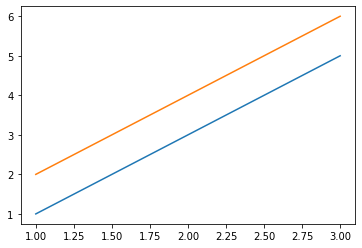

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = [0.85,-1.0275,1.010875]


x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#plt.show()